In [57]:
import pandas as pd
import numpy as np


numpy_data = np.array([[2, 1], [3, 4],[5, 0] , [7, 6], [9, 2]])
df_wine = numpy_data
print(df_wine)

[[2 1]
 [3 4]
 [5 0]
 [7 6]
 [9 2]]


In [65]:
import numpy as np

cov_mat = np.cov(df_wine.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals,"\n",eigen_vecs)

[9. 5.] 
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [66]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)



In [67]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [68]:
print(df_wine[0].dot(w))

[2.23606798e+00 1.11022302e-16]


In [82]:
X_pca=np.array ([0*5])

X_pca = df_wine.dot(w)
print(X_pca)

[[ 2.23606798e+00  1.11022302e-16]
 [ 4.47213595e+00  2.23606798e+00]
 [ 4.47213595e+00 -2.23606798e+00]
 [ 8.94427191e+00  2.23606798e+00]
 [ 8.94427191e+00 -2.23606798e+00]]


In [83]:
y_train = []
for i in range(len(df_wine)):
  y_train.append(df_wine[i][1])
print(y_train)

[1, 4, 0, 6, 2]


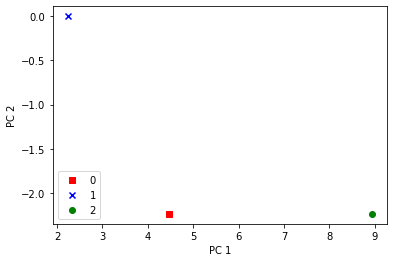

In [86]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_pca[y_train==l, 0], 
                X_pca[y_train==l, 1], 
                c=c, label=l , marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [89]:
iris_data = pd.read_csv('iris.csv')

In [92]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


In [ ]:
classifier = knn
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
